# Report 7: Large-scale neighbourhood search

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/7

## Problem description:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to # TODO

## LNS pseudocode

```
function lns(matrix, finish_time, with_ls):
    x, cost = steepest(matrix, random_solution(matrix))
        
    best_solution, best_cost = x, cost
    
    while time.time() < finish_time:
        x = destroy(x)
        x = repair(x)
        
        if with_ls:
            y, y_cost = steepest(matrix, x)
            if y_cost < best_cost:
                best_solution, best_cost = y, y_cost
                x = y
        else:
            x_cost = calculate_cost(x, matrix)
            if x_cost < best_cost:
                best_solution, best_cost = x, x_cost

    return best_solution, best_cost
```

Destroy operator

TODO

Repair operator

TODO

In [1]:
from scripts import *

np.random.seed(123)

a = "../data/TSPA.csv"
b = "../data/TSPB.csv"
c = "../data/TSPC.csv"
d = "../data/TSPD.csv"

In [2]:
m = get_dist_matrix(a)
sol = random_solution(m)
d = destroy(sol)
print(d)
r, r_c = repair(m,  d)
print(r)

[ 50 127  37  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  26 144  52  79  93 183 119  85 133
 184 139  95 140  24 150 114  33  23 171  41 100 152  71 186 110  42 120
 191 161  10 175  77  62  81 107 112 145   8 151 154  90  36  63  28  13
 159  80 156  44 192 157 130  60   7  30 177 132  29  35   0 188  45 137
  40  59 147  46 125   5  16 169  65  74]
[50, 127, 37, 26, 24, 144, 52, 79, 93, 7, 183, 22, 119, 85, 18, 15, 133, 184, 139, 95, 25, 140, 21, 24, 150, 4, 114, 17, 33, 23, 10, 171, 41, 100, 16, 11, 152, 20, 71, 186, 110, 42, 120, 5, 191, 161, 10, 175, 77, 62, 81, 107, 112, 145, 8, 151, 154, 90, 9, 36, 63, 23, 28, 13, 26, 19, 159, 3, 80, 14, 12, 156, 6, 44, 192, 157, 130, 60, 7, 30, 177, 132, 29, 35, 0, 188, 45, 137, 40, 59, 147, 46, 13, 125, 8, 5, 16, 169, 65, 74]


Average time per iteration: 32.90353465080261 s
Average ILS iterations: 2.0
Results: 80094.0(80094 - 80094)
Best solution: [0, 1, 4, 5, 6, 7, 8, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 34, 36, 40, 41, 43, 45, 48, 50, 51, 53, 55, 59, 61, 62, 64, 66, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 93, 94, 95, 96, 98, 108, 109, 112, 113, 114, 117, 119, 121, 123, 124, 127, 128, 132, 135, 137, 141, 143, 144, 147, 149, 150, 152, 153, 154, 155, 156, 159, 161, 163, 164, 167, 169, 170, 172, 175, 177, 178, 180, 181, 185, 186, 189, 190, 192, 194, 195, 199]


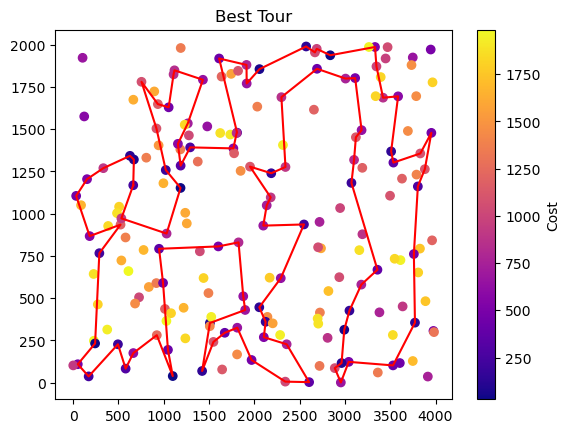

In [2]:
run_lns(a, 1)

### Second LNS - without LS

Average time per iteration: 30.715908527374268 s
Average ILS iterations: 2.0
Results: 77741.0(77741 - 77741)
Best solution: [0, 1, 4, 6, 8, 11, 19, 20, 21, 22, 24, 26, 27, 31, 34, 36, 37, 40, 41, 43, 48, 50, 51, 53, 55, 59, 60, 61, 62, 64, 66, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 92, 94, 95, 96, 98, 99, 101, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 119, 121, 123, 124, 128, 130, 132, 134, 135, 137, 141, 143, 147, 149, 150, 152, 153, 154, 156, 157, 159, 161, 163, 164, 167, 169, 171, 174, 175, 177, 178, 181, 185, 186, 189, 192, 194, 195, 199]


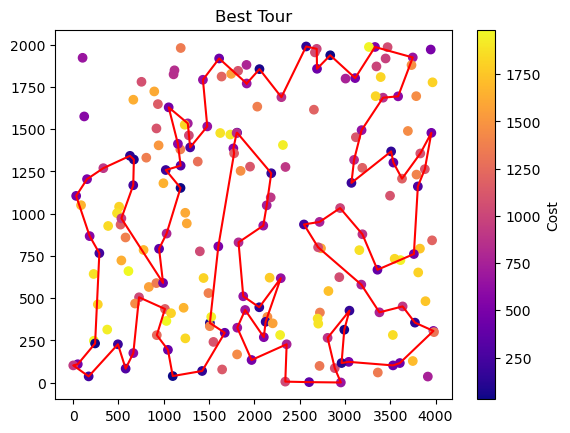

In [3]:
run_lns(a, 1, False)

### Objective function values:

| Algorithm | Instance A  | Instance B   | Instance C   | Instance D   |
|-----------|----------|----------|----------|----------|
| MLSL (baseline) | 75093.15(74399 - 75615) | 68222.2(67457 - 68718) |  49098.0(48636 - 49552) | 45526.9(45068 - 46057) |
| ILS | 73835.35(73526 - 74142) | 67134.0(66761 - 67455) | 48226.4(47776 - 49000) | 44217.2(43837 - 44909) |
| LNS | avg(min - max) | avg(min - max) | avg(min - max) | avg(min - max) |
| LNS_without_LS | avg(min - max) | avg(min - max) | avg(min - max) | avg(min - max) |


### Average time per instance values (in seconds):

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| baseline | 7.146 | 7.249 | 7.368 | 7.092 |
| ILS | 1.680 | 1.741 | 1.746 | 1.761 |
| LNS | avg(min - max) | avg(min - max) | avg(min - max) | avg(min - max) |
| LNS_without_LS | avg(min - max) | avg(min - max) | avg(min - max) | avg(min - max) |

### Average number of iterations per run for ILS:

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| ILS | 860.0 | 830.0 | 826.2 | 820.8 |
| LNS | avg | avg | avg | avg |
| LNS_without_LS | avg | avg | avg | avg |

### Conclusions:

TODO